First I imported pandas, the dataset, and looked at the first ten rows of the data set to see the information included

In [2]:
import pandas as pd

%matplotlib inline

In [3]:
data = pd.read_csv("playgrounds.csv")

In [4]:
data.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


Here I counted the number of playground equipment per neighborhood. A neighborhood with lots of playground equipment means that there are lots of opportunities for kids to play and there there are probably other children in the area.

In [5]:
d = {}

for index,row in data.iterrows():
    stat = True
    n = row["neighborhood"]
    for name in d:
        if(name == n):
            d[name] = d[name] + 1
            stat = False
    if(stat):
        d[n] = 1
print(d)

{'Beechview': 21, 'Allegheny Center': 15, 'Squirrel Hill South': 32, 'Windgap': 5, 'Perry South': 3, 'Crafton Heights': 5, 'Fineview': 8, 'Terrace Village': 4, 'Hazelwood': 13, 'Lincoln Place': 9, 'Sheraden': 13, 'Brookline': 7, 'Oakwood': 4, 'New Homestead': 5, 'South Side Slopes': 14, 'Upper Hill': 5, 'Brighton Heights': 8, 'Allentown': 4, 'East Liberty': 26, 'Highland Park': 10, 'Central Northside': 4, 'Bloomfield': 7, 'Mount Washington': 10, 'Shadyside': 5, 'Westwood': 2, 'Hays': 3, 'Polish Hill': 4, 'Central Oakland': 2, 'Lincoln-Lemington-Belmar': 6, 'Esplen': 2, 'Greenfield': 7, 'Crawford-Roberts': 8, 'Bedford Dwellings': 3, 'Marshall-Shadeland': 5, 'Beltzhoover': 10, 'West Oakland': 1, 'Elliott': 11, 'Spring Garden': 3, 'Homewood West': 4, 'Strip District': 1, 'Stanton Heights': 3, 'East Carnegie': 2, 'Upper Lawrenceville': 5, 'South Oakland': 9, 'Morningside': 5, 'South Side Flats': 5, 'Central Lawrenceville': 3, 'Manchester': 7, 'Garfield': 9, 'Lower Lawrenceville': 2, 'Carri

Here I grouped everything the same as before but only included the values that were 9 or higher. I chose 9 after looking at the values above and seeing what would not cut down the data too much while also trying to find the best neighborhoods. 

In [5]:
use = lambda x, threshold: x["equipment_type"].count() > threshold

good_park = data.groupby("neighborhood").filter(use, threshold = 9)

# look at what centers are in the data now
good_park.groupby("neighborhood").count()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15,15,15
Beechview,21,21,21,21,14,21,16,21,21,21,21,21,21,21,21,21,21
Beltzhoover,10,10,10,9,9,10,10,10,10,10,10,10,10,10,10,10,10
East Liberty,26,26,26,26,8,26,20,26,26,26,26,26,26,26,26,26,26
Elliott,11,11,11,11,11,11,9,11,11,11,11,11,11,11,11,11,11
Hazelwood,13,13,13,13,13,13,7,13,13,13,13,13,13,13,13,13,13
Highland Park,10,10,10,7,10,10,3,10,10,10,10,10,10,10,10,10,10
Mount Washington,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Sheraden,13,13,13,13,13,13,9,13,13,13,13,13,13,13,13,13,13


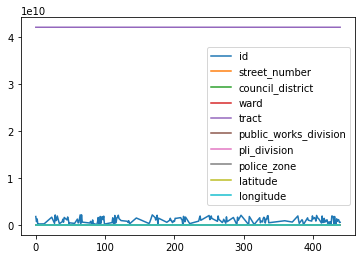

In [6]:
good_park.plot()

In [ ]:
good_park.plot()

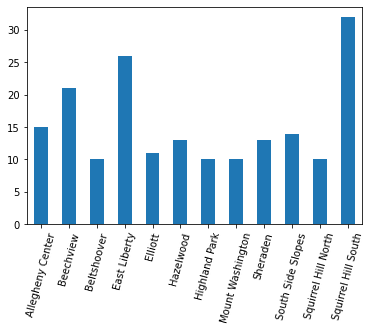

In [16]:
top = pd.Series([15,21,10,26,11,13,10,10,13,14,10,32], index = ["Allegheny Center", "Beechview", "Beltshoover", "East Liberty", "Elliott", "Hazelwood", "Highland Park", "Mount Washington", "Sheraden", "South Side Slopes", "Squirrel Hill North", "Squirrel Hill South"])
top.plot(kind = "bar", rot = 75)